<a href="https://colab.research.google.com/github/Sreeshbk/binance_datascience/blob/main/L03_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x

Sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising = pd.read_csv("./data/Advertising.csv",index_col=0)
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
X= advertising.drop('Sales',axis=1)
y= advertising['Sales']

## Polynomial Regression

**From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the degree of the model. Our metric results on the test set will help us with this!

**The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take *interaction* terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].**

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
print("PolynomialFeatures automatically creates both higher order feature polynomials and the interaction between all feature combinations")
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

PolynomialFeatures automatically creates both higher order feature polynomials and the interaction between all feature combinations


In [6]:
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features = polynomial_converter.fit_transform(X)

In [7]:
print(f''' Shape of X {X.shape}
  Shape of poly_features {poly_features.shape}''')

 Shape of X (200, 3)
  Shape of poly_features (200, 9)


In [8]:
print(f''' For the first row 
{'*'*40}
{X.iloc[0]}
  
poly_features values are
{'*'*40}
{poly_features[0]}''')

 For the first row 
****************************************
TV           230.1
Radio         37.8
Newspaper     69.2
Name: 1, dtype: float64
  
poly_features values are
****************************************
[2.301000e+02 3.780000e+01 6.920000e+01 5.294601e+04 8.697780e+03
 1.592292e+04 1.428840e+03 2.615760e+03 4.788640e+03]


In [9]:
print(f'''In poly_features[0] ,
The first 3 terms are input {poly_features[0][:3]}
Next 3 terms are Interaction and square term 
    poly_features[0][0]* poly_features[0][0]    {poly_features[0][0]* poly_features[0][0]}     
    poly_features[0][0]* poly_features[0][1]    {poly_features[0][0]* poly_features[0][1]}     
    poly_features[0][0]* poly_features[0][2]    {poly_features[0][0]* poly_features[0][2]}    
    poly_features[0][1]* poly_features[0][1]    {poly_features[0][1]* poly_features[0][1]} 
    poly_features[0][1]* poly_features[0][2]    {poly_features[0][1]* poly_features[0][2]}
    poly_features[0][2]* poly_features[0][2]    {poly_features[0][2]* poly_features[0][2]} 
    result {poly_features[0][3:]}
      ''')

In poly_features[0] ,
The first 3 terms are input [230.1  37.8  69.2]
Next 3 terms are Interaction and square term 
    poly_features[0][0]* poly_features[0][0]    52946.009999999995     
    poly_features[0][0]* poly_features[0][1]    8697.779999999999     
    poly_features[0][0]* poly_features[0][2]    15922.92    
    poly_features[0][1]* poly_features[0][1]    1428.8399999999997 
    poly_features[0][1]* poly_features[0][2]    2615.7599999999998
    poly_features[0][2]* poly_features[0][2]    4788.64 
    result [52946.01  8697.78 15922.92  1428.84  2615.76  4788.64]
      


Train/Test split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(poly_features,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_predictions = model.predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [14]:
MAE = mae(y_test,y_predictions)
MSE = mse(y_test,y_predictions)
RMSE = np.sqrt(MSE)
print(f"The prediction has MAE ={MAE}, MSE ={MSE} and RMSE={RMSE}")

The prediction has MAE =0.5905974833807935, MSE =0.5231944949055296 and RMSE=0.7233218473857468


The predictions are better than the Linear Regression in the previous notebook

Results on the Test Set (Note: Use the same Random Split to fairly compare!)

Simple Linear Regression:

MAE 1.5116692224549086, MSE 3.796797236715219 and RMSE 1.9485372043446385

Polynomial 2-degree:

MAE =0.5905974833807935, MSE =0.5231944949055296 and RMSE=0.7233218473857468

In [15]:
print("Coefficients used by the Model ", model.coef_)

Coefficients used by the Model  [ 0.05478172  0.01311214  0.01086391 -0.00011074  0.00108048 -0.00010764
  0.00030191  0.00017541  0.00010075]


Adjusting Parameters:

Let's use a for loop to do the following:

- Create different order polynomial X data
- Split that polynomial data for train/test
- Fit on the training data
- Report back the metrics on both the train and test results
- Plot these results and explore overfitting

In [18]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mse(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mse(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [24]:
len(train_rmse_errors)

9

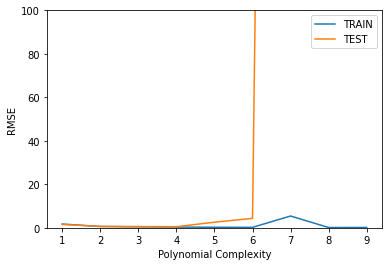

In [23]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylim(0,100)
plt.ylabel("RMSE")
plt.legend()

** Based on our chart, could have also been degree=4, but it is better to be on the safe side of complexity and choose degree as 3**

# Finalizing Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

- Choose final parameters based on test metrics
- Retrain on all data
- Save Polynomial Converter object
- Save model

In [25]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
final_model = LinearRegression()
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Saving Model and Converter

In [26]:
from joblib import dump, load
dump(final_model, 'sales_poly_model.joblib') 

['sales_poly_model.joblib']

In [27]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

## Deployment and Predictions

In [28]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [33]:
campaign = [[149,22,12]]
campaign_poly = loaded_poly.transform(campaign)
print(f'''Our next ad campaign will have a total spend of 
 - 149k on TV, 
 - 22k on Radio, and 
 -  12k on Newspaper Ads,
 how many units could we expect to sell as a result of this?
 
 Give campaign {campaign}
 polynomial features {campaign_poly}
 
 Predicted Sales is {final_model.predict(campaign_poly)}''')


Our next ad campaign will have a total spend of 
 - 149k on TV, 
 - 22k on Radio, and 
 -  12k on Newspaper Ads,
 how many units could we expect to sell as a result of this?
 
 Give campaign [[149, 22, 12]]
 polynomial features [[1.490000e+02 2.200000e+01 1.200000e+01 2.220100e+04 3.278000e+03
  1.788000e+03 4.840000e+02 2.640000e+02 1.440000e+02 3.307949e+06
  4.884220e+05 2.664120e+05 7.211600e+04 3.933600e+04 2.145600e+04
  1.064800e+04 5.808000e+03 3.168000e+03 1.728000e+03]]
 
 Predicted Sales is [14.64501014]


Other Regression Topics:

[Simple Linear Regression](./L01_simple_linear_regression.ipynb)   
[Linear Regression](./L02_linear_regression.ipynb)        
[Regularization - Ridge-Lasso-ElasticNet](./L04_regularization.ipynb)

[Anscombes Quartet](./E01_anscombes_quartet.ipynb)


